In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Data Preparation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/streaming_data.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
df.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


Alguns dados devem ser corrigidos antes de conseguirmos fazer qualquer inferencia estatistica sobre nossa base.
As colunas de tempo da plataforma, quantidade de dispositivos conectadoes, número de streamings assinados, avaliação média e churned contém dados NaN, esses serão substituidos por 0.  

In [ ]:
col_names = ['Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Avg_rating', 'Churned']
for col in col_names:
    df[col].fillna(0, inplace=True)

Os dados nulos em idade, gênero e tipo de subscrição, não podem ser substituidos por 0, ou qualquer outra metrica como média, mediana e etc. sem prejuizo para um futuro modelo, logo serão excluidas da base de dados as entradas dos usuários, que não preencheram essas dados.

Como pela base não da para saber qual são as limitaçãos dos tipos de subscrição a alternativa é realmente eliminar as linhas que não tem esses valores.

In [ ]:
df.dropna(subset=['Age'], inplace=True)
df.dropna(subset=['Gender'], inplace=True)
df.dropna(subset=['Subscription_type'], inplace=True)

In [ ]:
df.drop(columns=['User_id'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
X, y = df.drop('Churned', axis=1), df['Churned']

In [ ]:
scaler = MinMaxScaler()
X['Age'] = scaler.fit_transform(X['Age'].values.reshape(-1,1))
X['Time_on_platform'] = scaler.fit_transform(X['Time_on_platform'].values.reshape(-1,1))
X['Avg_rating'] = scaler.fit_transform(X['Avg_rating'].values.reshape(-1,1))



In [ ]:
X = pd.get_dummies(X)

In [ ]:
X = X.astype(float)

In [ ]:
X.head()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,0.607843,0.536591,3.0,0.0,3.0,0.000,0.0,1.0,1.0,0.0,0.0
1,1.000000,0.697226,2.0,0.0,1.0,0.428,1.0,0.0,0.0,0.0,1.0
2,0.509804,0.727709,3.0,1.0,1.0,0.382,0.0,1.0,0.0,1.0,0.0
3,0.156863,0.000000,5.0,0.0,2.0,0.000,0.0,1.0,1.0,0.0,0.0
5,0.705882,0.345245,2.0,0.0,1.0,0.000,0.0,1.0,1.0,0.0,0.0


In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
import statsmodels.api as sm


# Separando as features e o target
X_stats = X
y_stats = y

# Adicionando uma constante à matriz de features (necessário para o statsmodels)
X_stats = sm.add_constant(X_stats)

# Criando o modelo de regressão logística
modelo = sm.Logit(y_stats, X_stats)

# Ajustando o modelo aos dados
resultado = modelo.fit()

# Imprimindo o sumário do modelo, que inclui os p-values de cada feature
print(resultado.summary())

MissingDataError: exog contains inf or nans

#Features Engineering

Como o p-values do tipo de subscrição, sexo, numero de perfis ativos, numero de dispositivos conectados e idade tem um p-value muito alto essas informações não são uteis para determinar se o cliente da base é um futuro churned ou não, logo serão eliminadas.

In [ ]:
X.drop(columns=['Subscription_type_Basic','Subscription_type_Premium','Subscription_type_Standard',
                'Gender_Male', 'Gender_Female',
                'Devices_connected', 'Num_active_profiles', 'Age'], inplace=True)

In [ ]:

# Separando as features e o target
X_stats = X
y_stats = y

# Adicionando uma constante à matriz de features (necessário para o statsmodels)
X_stats = sm.add_constant(X_stats)

# Criando o modelo de regressão logística
modelo = sm.Logit(y_stats, X_stats)

# Ajustando o modelo aos dados
resultado = modelo.fit()

# Imprimindo o sumário do modelo, que inclui os p-values de cada feature
print(resultado.summary())

Optimization terminated successfully.
         Current function value: 0.490750
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Churned   No. Observations:                36515
Model:                          Logit   Df Residuals:                    36511
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Aug 2024   Pseudo R-squ.:               0.0002669
Time:                        22:59:08   Log-Likelihood:                -17920.
converged:                       True   LL-Null:                       -17925.
Covariance Type:            nonrobust   LLR p-value:                   0.02260
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.4611      0.028    -52.181      0.000      -1.516      

#Modeling

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn,label
9360,0.725490,0.275716,2.0,0.0,3.0,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
70652,0.254902,0.588994,5.0,0.0,3.0,0.922,1.0,0.0,1.0,0.0,0.0,1.0,0.0
68188,0.058824,0.964037,4.0,0.0,4.0,0.224,1.0,0.0,1.0,0.0,0.0,0.0,0.0
26008,0.274510,0.094988,5.0,0.0,2.0,0.986,0.0,1.0,1.0,0.0,0.0,0.0,0.0
70075,0.745098,0.275716,1.0,0.0,5.0,0.686,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25831,0.235294,0.000000,0.0,0.0,2.0,0.454,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9172,0.862745,0.236214,0.0,0.0,4.0,0.000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4310,0.843137,0.376413,0.0,0.0,2.0,0.916,1.0,0.0,1.0,0.0,0.0,1.0,0.0
23150,0.196078,0.000000,0.0,0.0,5.0,0.336,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:


ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format='d')
plt.show()

NameError: name 'lr' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
def metrics(X_train, X_test, y_train, y_test, model):
  """
  Função para calcular as métricas de avaliação de um modelo de machine learning.
  Args:
    X_train: Features de treino
    X_test: Featurs de teste
    y_train: Target de treino
    y_test: Target de teste
    model: Modelo de machine learning
  Returns:
    Métricas de avaliação do modelo
  """
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)
  for metric in [accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score]:
    print(f"{metric.__name__} (Treino): {metric(y_train, y_train_predict)}")
    print(f"{metric.__name__} (Teste): {metric(y_test, y_test_predict)}")
    print("====================================")

  print(f"ROCAUC (Treino): {roc_auc_score(y_train, model.predict_proba(X_train)[:,1])}")
  print(f"ROCAUC (Teste): {roc_auc_score(y_test, model.predict_proba(X_test)[:,1])}")
  return None

In [ ]:
metrics(X_train, X_test, y_train, y_test, lr)


accuracy_score (Treino): 0.8067917294262632
accuracy_score (Teste): 0.8067574969190744
balanced_accuracy_score (Treino): 0.5
balanced_accuracy_score (Teste): 0.5
precision_score (Treino): 0.0
precision_score (Teste): 0.0
recall_score (Treino): 0.0
recall_score (Teste): 0.0
f1_score (Treino): 0.0
f1_score (Teste): 0.0
ROCAUC (Treino): 0.5260737450821616
ROCAUC (Teste): 0.4986127860477165


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
metrics(X_train, X_test, y_train, y_test, rf)

accuracy_score (Treino): 0.9994522798849788
accuracy_score (Teste): 0.8113446528823771
balanced_accuracy_score (Treino): 0.998582565556343
balanced_accuracy_score (Teste): 0.5327498446563766
precision_score (Treino): 1.0
precision_score (Teste): 0.5888594164456233
recall_score (Treino): 0.997165131112686
recall_score (Teste): 0.07865367581930913
f1_score (Treino): 0.9985805535841022
f1_score (Teste): 0.13877168307548055
ROCAUC (Treino): 0.999999037722713
ROCAUC (Teste): 0.5589287019654835


#Tuning

Como nosso modelo classica usuários da base como Churned ou não Churned, o ideal é que se consiga classificar o melhor possível usuários que vão deixar a base como Churned, para que se possa tomar medidas e evitar o prejuizo desses usuários deixando de ser clientes do serviço. Logo a principal metrica para esse tipo de modelo deve, ser o recall. Entretanto não adianta ter um modelo que capte todos os usuários que são Churned mais classifique usuários que se manteriam na base como Churned, já que possivelmente a empresa tomará medidas onerosas para remediar a questão, um modelo assim, com ótimo sensibilidade, mas que não tivesse uma alta acurácia levaria a gastos desnecessários.
Tendo isso em vista, usaremos o GridSearchCV usando a metrica de acurácia balanceada  para buscar os melhores hiperparametros para o modelo Random Forest.


In [ ]:
# prompt: calcule quanto a classes estão desbalanceadas na base

# Calcula a quantidade de amostras em cada classe
class_counts = y.value_counts()

# Calcula a proporção de cada classe
class_proportions = class_counts / class_counts.sum()

# Imprime as proporções
print(class_proportions)


Churned
0.0    0.806764
1.0    0.193236
Name: count, dtype: float64


In [ ]:
from sklearn.utils.class_weight import compute_sample_weight # Import the missing function

# Define os pesos das classes com base nas proporções calculadas
class_weights = {0: 1/class_proportions[1], 1: 1/class_proportions[0]}
# Calculate sample weights using y_train
sample_weights = compute_sample_weight('balanced', y_train)


In [ ]:
#GridSearchCV para random forest

# Define o espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [None, 5, 10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'class_weight' : ['balanced', class_weights]
}

# Cria o objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)

# Ajusta o GridSearchCV aos dados de treino
grid_search.fit(X_train, y_train, sample_weight=sample_weights)

# Imprime os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Cria um novo modelo RandomForestClassifier com os melhores hiperparâmetros
best_rf = grid_search.best_estimator_
# Avalia o modelo nos dados de teste
metrics(X_train, X_test, y_train, y_test, best_rf)


Melhores hiperparâmetros: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
accuracy_score (Treino): 0.9068875804463918
accuracy_score (Teste): 0.6575037655757908
balanced_accuracy_score (Treino): 0.9422946367956551
balanced_accuracy_score (Teste): 0.5286071901819749
precision_score (Treino): 0.6747967479674797
precision_score (Teste): 0.22599296128707894
recall_score (Treino): 1.0
recall_score (Teste): 0.31851195748449956
f1_score (Treino): 0.8058252427184466
f1_score (Teste): 0.26439232409381663
ROCAUC (Treino): 0.9975149189064874
ROCAUC (Teste): 0.5408536872974299


#Reengineering Features

In [ ]:
# prompt: ajuste a base para não ficar desbalanceada fazendo undersampling

from imblearn.under_sampling import RandomUnderSampler

# Inicializa o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplica o undersampling aos dados de treino
X_resampled, y_resampled = rus.fit_resample(X, y)

# Verifica o balanceamento das classes após o undersampling
print(pd.Series(y_resampled).value_counts())


Churned
0.0    7056
1.0    7056
Name: count, dtype: int64


In [ ]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled,
                                                                                            test_size=0.2,
                                                                                            random_state=42,
                                                                                            )

#Remodeling

In [ ]:
rf_resampled = RandomForestClassifier(random_state=42)
rf_resampled.fit(X_train_resampled, y_train_resampled)
metrics(X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, rf_resampled)

accuracy_score (Treino): 0.9030029231995748
accuracy_score (Teste): 0.549061282323769
balanced_accuracy_score (Treino): 0.9030485418694795
balanced_accuracy_score (Teste): 0.5488437405882943
precision_score (Treino): 0.885360054347826
precision_score (Teste): 0.5504032258064516
recall_score (Treino): 0.9254393751109533
recall_score (Teste): 0.5755446240337315
f1_score (Treino): 0.9049561669993923
f1_score (Teste): 0.5626932325661285
ROCAUC (Treino): 0.9717110174409189
ROCAUC (Teste): 0.5849934745507479


In [ ]:
# prompt: GridSearchCV para random forest usando X_train_resampled que não me gere overfitting

# Define o espaço de busca dos hiperparâmetros, buscando por valores que generalizem melhor.
param_grid = {
    'n_estimators': [200,300,500],
    'max_depth': [5,7,10],
    'min_samples_split': [5, 10,15],
    'min_samples_leaf': [2, 4,7],
    'max_features': ['sqrt', None],
    'class_weight' : ['balanced']
}

# Cria o objeto GridSearchCV
grid_search_resampled = GridSearchCV(estimator=rf_resampled, param_grid=param_grid, cv=10, scoring='balanced_accuracy', n_jobs=-1)

# Ajusta o GridSearchCV aos dados de treino resampled
grid_search_resampled.fit(X_train_resampled, y_train_resampled)

# Imprime os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search_resampled.best_params_)

# Cria um novo modelo RandomForestClassifier com os melhores hiperparâmetros
best_rf_resampled = grid_search_resampled.best_estimator_

# Avalia o modelo nos dados de teste resampled
metrics(X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled, best_rf_resampled)


Melhores hiperparâmetros: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
accuracy_score (Treino): 0.7394809106209584
accuracy_score (Teste): 0.5324123273113709
balanced_accuracy_score (Treino): 0.7394767611350672
balanced_accuracy_score (Teste): 0.5323062443529766
precision_score (Treino): 0.7396723646723646
precision_score (Teste): 0.5355417529330573
recall_score (Treino): 0.7374400852121428
recall_score (Teste): 0.5453267744202389
f1_score (Treino): 0.7385545381811716
f1_score (Teste): 0.5403899721448467
ROCAUC (Treino): 0.8200736855532322
ROCAUC (Teste): 0.5416850717799417


In [ ]:
X_test_resampled.assign(churn = y_test_resampled).assign(label = best_rf_resampled.predict(X_test_resampled))

,Time_on_platform,Num_streaming_services,Avg_rating,churn,label
10855,0.409864,0.0,0.552,1.0,0.0
43784,0.411348,0.0,0.482,0.0,1.0
31428,0.525745,0.0,0.000,1.0,0.0
74650,0.603379,0.0,0.970,1.0,1.0
19612,0.000000,0.0,0.720,0.0,0.0
...,...,...,...,...,...
32755,0.865281,0.0,0.742,1.0,0.0
20518,0.978879,0.0,0.892,1.0,1.0
44446,0.248773,0.0,0.418,1.0,1.0
50093,0.452791,3.0,0.342,1.0,0.0


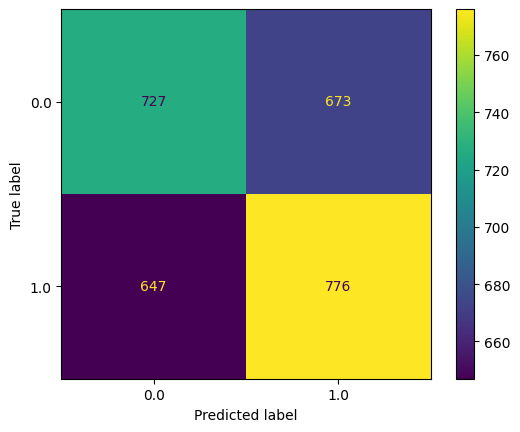

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_rf_resampled, X_test_resampled, y_test_resampled, values_format='d')
plt.show()


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/streaming_data.csv')
df2.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
df2.drop(columns=['User_id','Age','Gender','Devices_connected','Subscription_type','Num_active_profiles'], inplace=True)

In [ ]:
col_names = ['Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Churned']
for col in col_names:
    df2[col].fillna(0, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time_on_platform        77884 non-null  float64
 1   Num_streaming_services  77884 non-null  float64
 2   Avg_rating              77884 non-null  float64
 3   Churned                 77884 non-null  float64
dtypes: float64(4)
memory usage: 2.4 MB


In [ ]:
X,y = df2.drop('Churned', axis=1), df2['Churned']

In [ ]:
scaler = MinMaxScaler()
X['Time_on_platform'] = scaler.fit_transform(X['Time_on_platform'].values.reshape(-1,1))
X['Avg_rating'] = scaler.fit_transform(X['Avg_rating'].values.reshape(-1,1))

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_train, y_train)
metrics(X_train, X_test, y_train, y_test, rf2)

accuracy_score (Treino): 0.9488990177826282
accuracy_score (Teste): 0.7734122971736723
balanced_accuracy_score (Treino): 0.8724254965588423
balanced_accuracy_score (Teste): 0.5215112763588676
precision_score (Treino): 0.9784615384615385
precision_score (Teste): 0.2745851881829219
recall_score (Treino): 0.7487386478304743
recall_score (Teste): 0.11412952060555089
f1_score (Treino): 0.8483231707317074
f1_score (Teste): 0.16124049429657794
ROCAUC (Treino): 0.9692420614473455
ROCAUC (Teste): 0.5312099262045208


In [ ]:
rf2.feature_importances_

array([0.63816497, 0.0061765 , 0.35565853])

In [ ]:
df2.drop(columns=['Num_streaming_services'], inplace=True)

In [ ]:
X,y = df2.drop('Churned', axis=1), df2['Churned']

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X.head()

,Time_on_platform,Avg_rating
0,0.536591,0.000
1,0.697226,0.428
2,0.727709,0.382
3,0.000000,0.000
4,0.222400,0.776


In [ ]:
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_train, y_train)
metrics(X_train, X_test, y_train, y_test, rf2)

accuracy_score (Treino): 0.9422225075431726
accuracy_score (Teste): 0.7769111014813744
balanced_accuracy_score (Treino): 0.8537781533857611
balanced_accuracy_score (Teste): 0.5201062766468777
precision_score (Treino): 0.981421272642824
precision_score (Teste): 0.27676588183029766
recall_score (Treino): 0.7107299024554322
recall_score (Teste): 0.10479394449116905
f1_score (Treino): 0.8244245025360905
f1_score (Teste): 0.15202537823328455
ROCAUC (Treino): 0.9632526601681077
ROCAUC (Teste): 0.5275832050188393


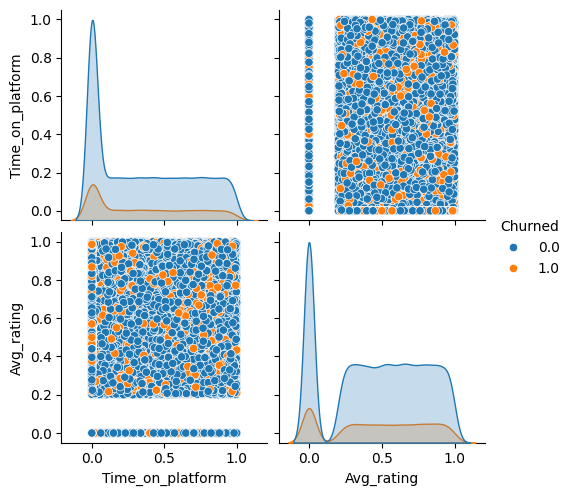

In [ ]:
# prompt: grafico das features em X usando y por cor

import matplotlib.pyplot as plt
import seaborn as sns

# Crie um gráfico de dispersão para cada par de features
sns.pairplot(X.assign(Churned=y), hue='Churned')
plt.show()


In [ ]:
# Inicializa o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplica o undersampling aos dados de treino
X_resampled, y_resampled = rus.fit_resample(X, y)

# Verifica o balanceamento das classes após o undersampling
print(pd.Series(y_resampled).value_counts())

NameError: name 'RandomUnderSampler' is not defined

In [ ]:
rf2_resampled = RandomForestClassifier(random_state=42)
X_test, X_train, y_test, y_train = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
rf2_resampled.fit(X_train, y_train)
metrics(X_train, X_test, y_train, y_test, rf2_resampled)

accuracy_score (Treino): 0.9201143625967036
accuracy_score (Teste): 0.5107232968881413
balanced_accuracy_score (Treino): 0.9201479333020542
balanced_accuracy_score (Teste): 0.5107131829506029
precision_score (Treino): 0.8999358563181526
precision_score (Teste): 0.5102737009123364
recall_score (Treino): 0.9450993600538902
recall_score (Teste): 0.5407768622835043
f1_score (Treino): 0.9219648431082635
f1_score (Teste): 0.5250826564349566
ROCAUC (Treino): 0.9811738428434095
ROCAUC (Teste): 0.5182368076288668


In [ ]:
# Define o espaço de busca dos hiperparâmetros, buscando por valores que generalizem melhor.
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [5, 7, 10],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 7],
    'max_features': ['sqrt', None],
    'class_weight': ['balanced']
}

# Cria o objeto GridSearchCV
grid_search_resampled = GridSearchCV(estimator=rf2_resampled, param_grid=param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)

# Ajusta o GridSearchCV aos dados de treino resampled
grid_search_resampled.fit(X_train, y_train)

# Imprime os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search_resampled.best_params_)

# Cria um novo modelo RandomForestClassifier com os melhores hiperparâmetros
best_rf2_resampled = grid_search_resampled.best_estimator_

# Avalia o modelo nos dados de teste resampled
metrics(X_train, X_test, y_train, y_test, best_rf2_resampled)


Melhores hiperparâmetros: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
accuracy_score (Treino): 0.767238479650185
accuracy_score (Teste): 0.5054247266610598
balanced_accuracy_score (Treino): 0.7672638539117629
balanced_accuracy_score (Teste): 0.5054165927128866
precision_score (Treino): 0.7570548167369445
precision_score (Teste): 0.5053349378259125
recall_score (Treino): 0.7861232738295723
recall_score (Teste): 0.5295947536573062
f1_score (Treino): 0.7713152676801058
f1_score (Teste): 0.517180508231044
ROCAUC (Treino): 0.8572810883213426
ROCAUC (Teste): 0.5087731464721139


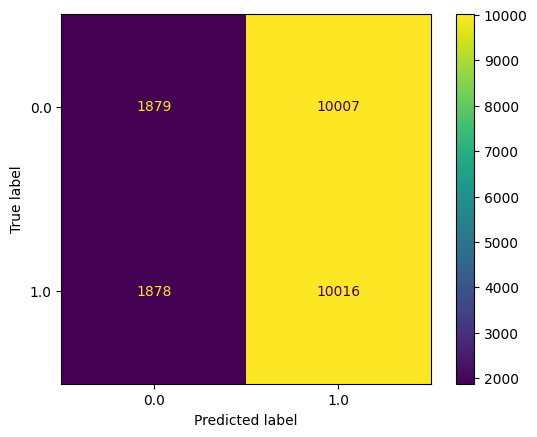

In [ ]:
# prompt: matrix de confusão

from sklearn.metrics import ConfusionMatrixDisplay

# Assuming 'best_rf_resampled' is your trained model and 'X_test_resampled', 'y_test_resampled' are your test data.
ConfusionMatrixDisplay.from_estimator(best_rf_resampled, X_test, y_test, values_format='d')
plt.show()
